# Revolutionizing Dermatology: AI-Driven Classification of Skin Lesions

Skin diseases comprise 1.79% of the global burden of disease. Due to the variation in skin tone, texture, body hair, etc., the accurate diagnosis of specific skin diseases is an intriguing task. Skin lesions can vary in diverse conditions, from benign growth to malignant
cancers. Also, these can have varying shapes, sizes, colors, and vague boundaries of some lesions.

Inaccurate or delayed diagnoses can result in critical situations, particularly in melanoma cases. In 2022, it was estimated that approximately 330,000 new cases of melanoma were diagnosed worldwide, with nearly 60,000 resulting in death (World Health Organization, 2022). If untreated this can be potentially lifethreatening. This project therefore seeks to leverage artificial intelligence in crafting an efficient classification system of skin lesions which can aid dermatologists in arriving at early and accurate diagnosis.

The International Skin Imaging Collaboration​ (ISIC) data is used for this purpose which is publicly available.

There are eight types of skin lesions which we work on. namely

A. Cancerous 
1. Melanoma (MEL)
2. Basal Cell Carcinoma (BCC)
3. Squamous Cell Carcinoma (SCC)

B. Non-Cancerous

4. Melanocytic Nevus (NV)
5. Actinic Keratosis (precancerous) (AK)
6. Benign Keratosis (BKL)
7. Dermatofibroma (DF)
8. Vascular Lesion (VASC)

### Brief descriptions about those skin lesions

The dataset comprises eight distinct categories of skin diseases and related conditions, each characterized by unique symptoms, lesion structures, color, and shape. An in-depth understanding of these categories is essential, as each condition presents specific morphological and chromatic variations.

### **Cancerous**

**MEL (Melanoma)**

- Description: Melanoma is a serious and potentially deadly form of skin cancer that arises from melanocytes (pigment-producing cells).
- Appearance: Typically appears as a new, unusual mole or an existing mole that changes in color, size, or shape, often with irregular borders.
- Risk: Highly aggressive and likely to spread if not detected early.
- Treatment: Surgical removal, immunotherapy, chemotherapy, or targeted therapies depending on the stage.

**BCC (Basal Cell Carcinoma)**

- Description: BCC is the most common type of skin cancer, arising from basal cells in the skin’s outermost layer.
- Appearance: Can appear as a pearly or waxy bump, often pink or skin-colored, sometimes with visible blood vessels.
- Risk: Usually slow-growing and rarely spreads but can be locally invasive.
- Treatment: Surgical removal, cryotherapy, or topical treatments.

**SCC (Squamous Cell Carcinoma)**

- Description: SCC is a type of skin cancer that arises from squamous cells, which are found in the skin’s upper layers.
- Appearance: Often appears as a red, scaly patch, nodule, or sore that may crust or bleed.
- Risk: More aggressive than BCC and can spread to other body parts if untreated.
- Treatment: Surgical excision, cryotherapy, or radiation therapy.


### **Non-Cancerous**

**NV (Melanocytic Nevi)**

- Description: Commonly known as moles, these are benign proliferations of melanocytes.
- Appearance: Small, brown, or black spots that can be flat or raised, often symmetrical with defined borders.
- Risk: Mostly benign, though some types may carry a slight risk of becoming melanoma.
- Treatment: Usually no treatment unless removed for cosmetic reasons or due to changes in appearance.


**AK (Actinic Keratosis)**

- Description: Actinic keratosis, also called solar keratosis, is a rough, scaly patch on the skin caused by years of sun exposure.
- Appearance: Often pink, red, or brown, with a rough or crusty texture.
- Risk: Precancerous, as it can develop into squamous cell carcinoma (SCC) if untreated.
- Treatment: Typically treated with cryotherapy, topical creams, or laser treatments.

**BKL (Benign Keratosis-like Lesions)**

- Description: BKL refers to a group of non-cancerous growths like seborrheic keratosis.
- Appearance: Lesions are typically brown or black and have a warty, waxy texture.
- Risk: Benign and not cancerous, though they may resemble skin cancers.
- Treatment: Often no treatment is required unless for cosmetic reasons.

**DF (Dermatofibroma)**

- Description: DF is a common benign skin growth, usually firm to the touch.
- Appearance: Small, raised nodule that can be skin-colored, pink, or brown. It’s often hard and doesn’t change much over time.
- Risk: Non-cancerous and doesn’t typically require treatment.
- Treatment: Only removed if bothersome or for cosmetic reasons.

**VASC (Vascular Lesions)**

- Description: Vascular lesions include conditions related to abnormal blood vessels, such as angiomas and hemangiomas.
- Appearance: Often red, purple, or blue, depending on the type, and can vary in shape and size.
- Risk: Generally benign and not cancerous.
- Treatment: Often unnecessary but can be removed for cosmetic reasons or if they cause complications.

### Sapmle photos of those types of skin lesions from the dataset.

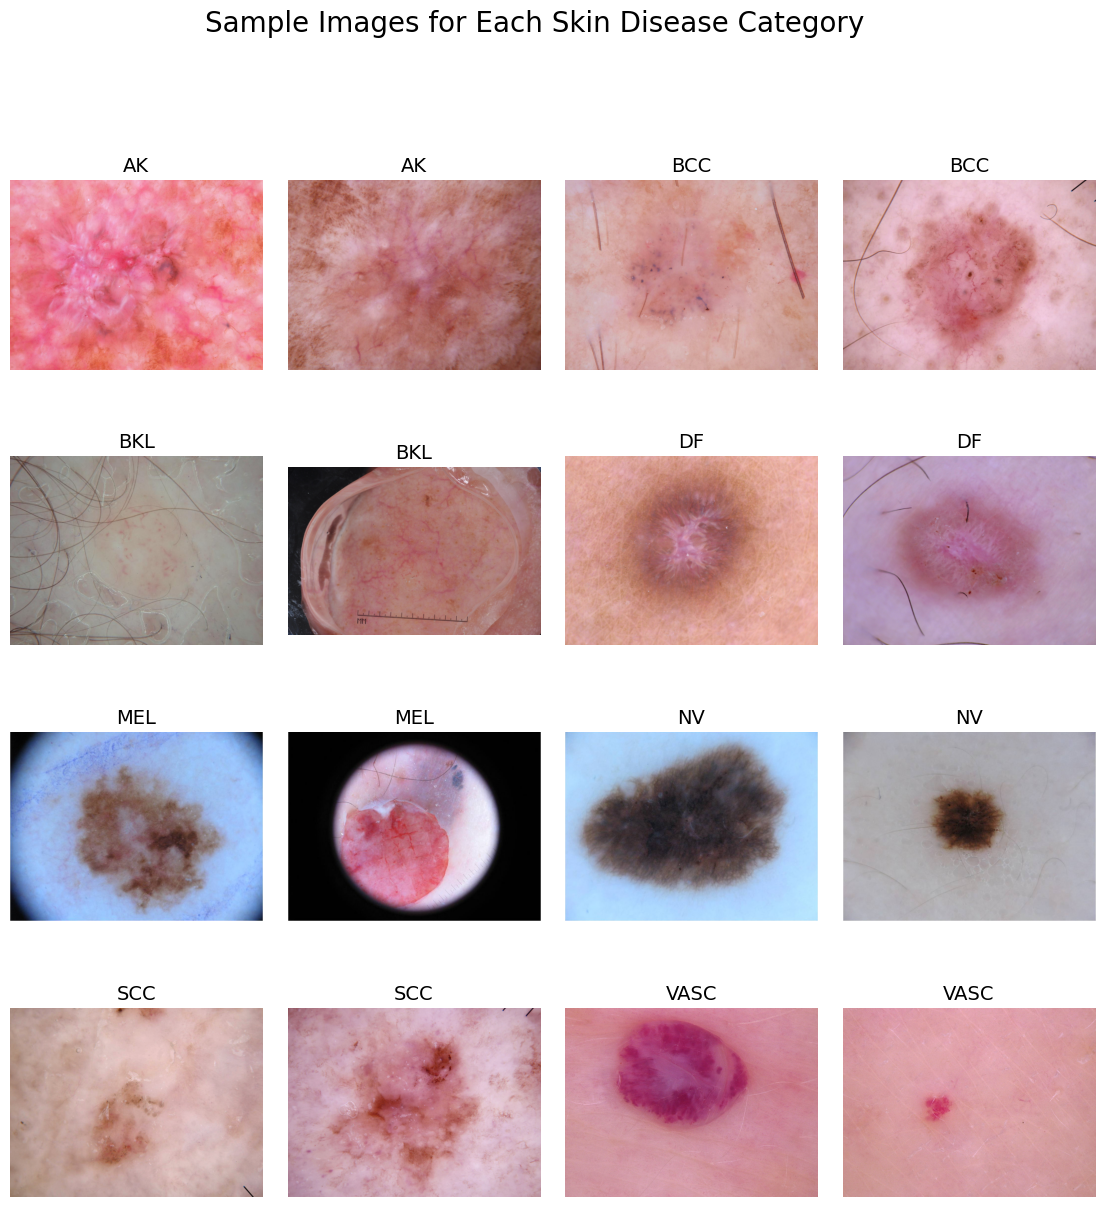

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the directory
# Check image folder structure

base_dir = r"D:\Sask Polytech- Artificial Inteligence & Data Analytis\Friday- PROJ-613-T02 Capstone Project\Skin Lesion- large dataset\SkinLesion"
categories = ["AK", "BCC", "BKL", "DF", "MEL", "NV", "SCC", "VASC"]

# Set up the figure for a grid of 2 images per category in 4 rows and 4 columns 
fig, axes = plt.subplots(4, 4, figsize=(14, 14))
fig.suptitle("Sample Images for Each Skin Disease Category", fontsize=20, color="#000000")
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, category in enumerate(categories):
    category_dir = os.path.join(base_dir, category)
    # Load two sample images from each category
    images = [img for img in os.listdir(category_dir) if img.endswith('.jpg')][:2]  # Get only the first two images
    
    for j, img_name in enumerate(images):
        img_path = os.path.join(category_dir, img_name)
        img = Image.open(img_path)
        
        # Positioning in 4x4 grid
        ax = axes[i // 2, 2 * (i % 2) + j]
        
        ax.imshow(img)
        ax.set_title(f"{category}", fontsize=14, color="#000000")
        ax.axis("off")

plt.show()

## Loading the necessary libraries and packages

In [2]:
# General and Data Libraries
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter

# Image Processing
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Data Balancing
from imblearn.over_sampling import RandomOverSampler

# Visualization Style
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

### Defining the path of images

In [5]:
data = pd.read_csv(r"D:\Sask Polytech- Artificial Inteligence & Data Analytis\Friday- PROJ-613-T02 Capstone Project\Skin Lesion- large dataset\SkinLesion\ISIC_2019_Training_GroundTruth.csv")
print("Data Shape:", data.shape)

# Check image folder structure
dataset_path = r"D:\Sask Polytech- Artificial Inteligence & Data Analytis\Friday- PROJ-613-T02 Capstone Project\Skin Lesion- large dataset\SkinLesion"
print(os.listdir(dataset_path))

Data Shape: (25331, 10)
['AK', 'BCC', 'BKL', 'DF', 'ISIC_2019_Training_GroundTruth.csv', 'ISIC_2019_Training_Metadata.csv', 'MEL', 'NV', 'SCC', 'VASC']


## Count of images in each category

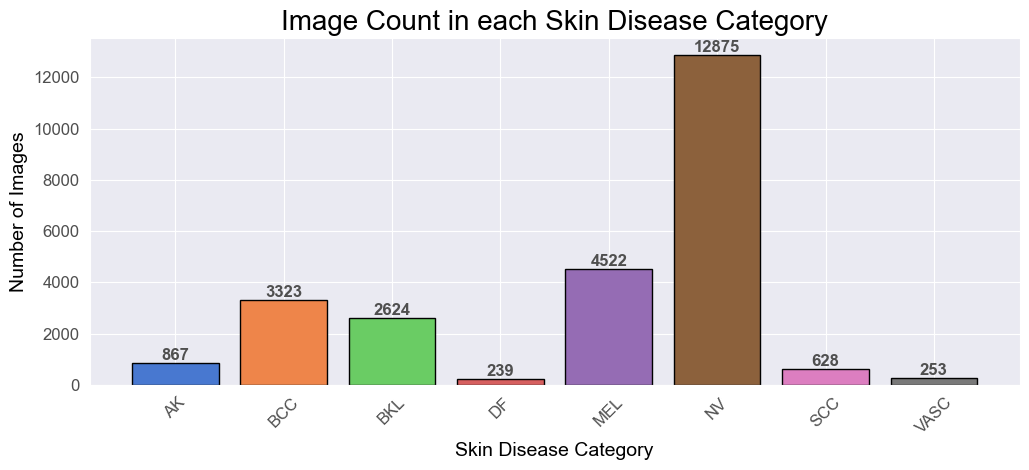

In [3]:
import seaborn as sns

# Count images in each category
image_counts = []
for category in categories:
    category_dir = os.path.join(base_dir, category)
    count = len([img for img in os.listdir(category_dir) if img.endswith('.jpg') or img.endswith('.png')])
    image_counts.append(count)

# Set color palette using seaborn's non-primary colors
palette = sns.color_palette("muted", len(categories))

# Create the bar chart
plt.figure(figsize=(12, 4.5))
bars = plt.bar(categories, image_counts, color=palette, edgecolor="#000")
plt.title("Image Count in each Skin Disease Category", fontsize=20, color="#000")
plt.xlabel("Skin Disease Category", fontsize=14, color="#000")
plt.ylabel("Number of Images", fontsize=14, color="#000")

# Add values on top of bars for clarity
for bar, count in zip(bars, image_counts):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{count}", ha="center", va="bottom", fontsize=12, color="#4f4f4f", weight="bold")

# Set xticks and rotate for readability
plt.xticks(rotation=45, fontsize=12, color="#4f4f4f")
plt.yticks(fontsize=12, color="#4f4f4f")

# Show the plot
plt.show()

## Use of Generative Adversial Network (GAN) to generate more images for undersampling category

From here we can see that our databese is imbalanced. Categories like DF, SCC & VASC contain very few images compare to other. So we will use GAN (Generative Adversial Network) to produce more images.

In [4]:
import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Define paths
base_path = r"D:\Sask Polytech- Artificial Inteligence & Data Analytis\Friday- PROJ-613-T02 Capstone Project\Skin Lesion- large dataset\SkinLesion"
target_classes = ["VASC", "DF", "SCC"]  # Undersampled categories

# Image parameters
IMG_SIZE = 28  # Resize images to 28x28

# Load images
def load_images(class_name):
    images = []
    class_path = os.path.join(base_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0  # Normalize
        images.append(img)
    return np.array(images)

# Load images from each undersampled category
data = {cls: load_images(cls) for cls in target_classes}

# Convert to tensors
dataset = np.vstack([data[cls] for cls in target_classes])
dataset = dataset.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # Reshape for CNN

print(f"Loaded dataset shape: {dataset.shape}")  # Should be (num_images, 28, 28, 3)

Loaded dataset shape: (1120, 28, 28, 3)


### Building generator

In [13]:
from tensorflow.keras import layers

def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(7*7*128, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((7, 7, 128)),  # Start with 7x7

        layers.Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(3, (3,3), strides=(2,2), padding='same', activation='tanh')  # 28x28 output
    ])
    return model

generator = build_generator()
generator.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 6272)           │       627,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 6272)           │        25,088 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        73,728 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 3)      │         1,731 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 728,003 (2.78 MB)

 Trainable params: 715,331 (2.73 MB)

 Non-trainable params: 12,672 (49.50 KB)

### Building discriminator

In [14]:
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=[28, 28, 3]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3,3), strides=(2,2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

discriminator = build_discriminator()
discriminator.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,921 (320.00 KB)

 Trainable params: 81,921 (320.00 KB)

 Non-trainable params: 0 (0.00 B)

### Developing the GAN model

In [15]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


In [16]:
import time

EPOCHS = 1000  # 1000 epochs
BATCH_SIZE = 32
noise_dim = 100

@tf.function
def train_step(real_images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Training loop
def train(dataset, epochs):
    for epoch in range(epochs):
        gen_loss, disc_loss = train_step(dataset)
        print(f"Epoch {epoch+1}/{epochs}: Generator Loss: {gen_loss.numpy():.4f}, Discriminator Loss: {disc_loss.numpy():.4f}")

train(dataset, EPOCHS)


Epoch 1/1000: Generator Loss: 0.6884, Discriminator Loss: 1.4003
Epoch 2/1000: Generator Loss: 0.6934, Discriminator Loss: 1.3667
Epoch 3/1000: Generator Loss: 0.6870, Discriminator Loss: 1.3433
Epoch 4/1000: Generator Loss: 0.6874, Discriminator Loss: 1.3202
Epoch 5/1000: Generator Loss: 0.6926, Discriminator Loss: 1.2902
Epoch 6/1000: Generator Loss: 0.6967, Discriminator Loss: 1.2573
Epoch 7/1000: Generator Loss: 0.6925, Discriminator Loss: 1.2394
Epoch 8/1000: Generator Loss: 0.7040, Discriminator Loss: 1.2035
Epoch 9/1000: Generator Loss: 0.6977, Discriminator Loss: 1.1886
Epoch 10/1000: Generator Loss: 0.7057, Discriminator Loss: 1.1579
Epoch 11/1000: Generator Loss: 0.6983, Discriminator Loss: 1.1452
Epoch 12/1000: Generator Loss: 0.7216, Discriminator Loss: 1.1012
Epoch 13/1000: Generator Loss: 0.7140, Discriminator Loss: 1.0879
Epoch 14/1000: Generator Loss: 0.7079, Discriminator Loss: 1.0716
Epoch 15/1000: Generator Loss: 0.7226, Discriminator Loss: 1.0402
Epoch 16/1000: Gene

### Generating images using GAN

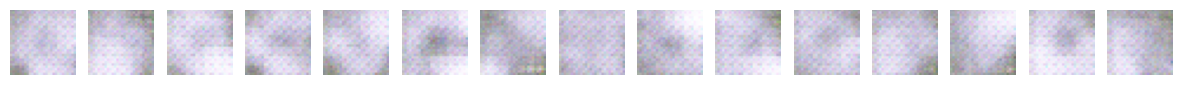

In [17]:
import matplotlib.pyplot as plt

def generate_and_save_images(num_images=15):
    noise = tf.random.normal([num_images, noise_dim])
    generated_images = generator(noise, training=False)

    fig, axs = plt.subplots(1, num_images, figsize=(15,15))
    for i in range(num_images):
        axs[i].imshow((generated_images[i] + 1) / 2)  # Rescale back to 0-1 range
        axs[i].axis('off')
    plt.show()

generate_and_save_images()


**So we can see even after runnig for 1000 times our GAN can't produce realistic images. It requires more epochs and images to propperly work. But as it's computationally time consuming and we have less images on some classes we will not use GAN for this.**

## Loading images from dataset

In [4]:
# Function load and resize images
def load_and_resize_images(image_paths, target_size=(28, 28)):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=target_size)  # Load and resize
        img_array = img_to_array(img)  # Convert to array
        images.append(img_array)
    return np.array(images)

In [18]:
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

# Define classes
class_folders = ['MEL', 'VASC', 'SCC', 'DF', 'NV', 'BKL', 'BCC', 'AK']

# Function to process a single image
def process_single_image(img_path):
    return load_and_resize_images([img_path])

# Load images and labels
all_images, all_labels = [], []

for class_name in class_folders:
    class_folder_path = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_folder_path)
    image_paths = [os.path.join(class_folder_path, img) for img in image_files]
    
    # Progress bar with parallel execution
    with ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(process_single_image, image_paths), 
                            total=len(image_paths), 
                            desc=f"Processing {class_name} images"))
    
    all_images.extend(results)
    all_labels.extend([class_name] * len(image_files))

# Combine all data
X_all = np.array(all_images)
y_all = np.array(all_labels)

print("Shape of all images:", X_all.shape)
print("Shape of all labels:", y_all.shape)


Processing AK images: 100%|██████████| 867/867 [00:04<00:00, 200.09it/s]


Shape of all images: (25331, 1, 28, 28, 3)
Shape of all labels: (25331,)


We see that in the top position there are 12875 images in NV category. The MEL has 4522 images keeping it in the second position.

To handle with this imbalance, we will generate maximum 5000 images from each categoty that to get similar with MEL which is out top most concern.

### Loading maxmum 5000 images from each class.

In [5]:
import os
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

# Define dataset path
dataset_path = "D:/Sask Polytech- Artificial Inteligence & Data Analytis/Friday- PROJ-613-T02 Capstone Project/Skin Lesion- large dataset/SkinLesion"

# Define classes
class_folders = ['MEL', 'VASC', 'SCC', 'DF', 'NV', 'BKL', 'BCC', 'AK']

# Max number of images per class
MAX_IMAGES_PER_CLASS = 5000

# Function to process a single image
def process_single_image(img_path):
    return load_and_resize_images([img_path])

# Load images and labels
all_images, all_labels = [], []

for class_name in class_folders:
    class_folder_path = os.path.join(dataset_path, class_name)
    
    # Get all image files and limit to 5000
    image_files = os.listdir(class_folder_path)[:MAX_IMAGES_PER_CLASS]
    image_paths = [os.path.join(class_folder_path, img) for img in image_files]
    
    # Progress bar with parallel execution
    with ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(process_single_image, image_paths), 
                            total=len(image_paths), 
                            desc=f"Processing {class_name} images"))
    
    all_images.extend(results)
    all_labels.extend([class_name] * len(image_files))

# Combine all data
X_all = np.array(all_images)
y_all = np.array(all_labels)

print("Shape of all images:", X_all.shape)
print("Shape of all labels:", y_all.shape)

Processing AK images: 100%|██████████| 867/867 [00:04<00:00, 182.17it/s]


Shape of all images: (17456, 1, 28, 28, 3)
Shape of all labels: (17456,)


### We see a random image from X_all numpy array to check if images are loaded properly

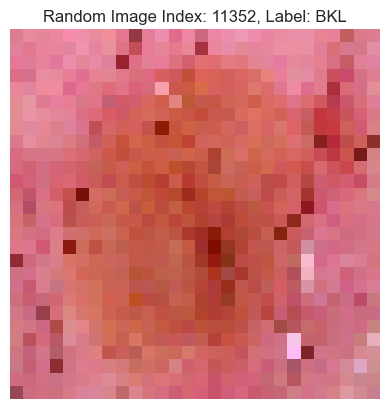

In [13]:
random_idx = np.random.randint(0, X_all.shape[0])
random_image = np.squeeze(X_all[random_idx])
label = y_all[random_idx]

# Normalize to [0,1] if float
if random_image.dtype == np.float32 or random_image.dtype == np.float64:
    random_image = (random_image - random_image.min()) / (random_image.max() - random_image.min())

plt.imshow(random_image)
plt.title(f"Random Image Index: {random_idx}, Label: {label}")
plt.axis('off')
plt.show()

### Labels encoding and Class Imbalance Correction using SMOTEENN Resampling

In [6]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_all)
y_one_hot = to_categorical(y_encoded)

from imblearn.combine import SMOTEENN

# Reshape data for resampling
X_reshaped = X_all.reshape(X_all.shape[0], -1)
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_reshaped, y_one_hot)

# Display class distribution
print("Class distribution after SMOTE and undersampling:", Counter(np.argmax(y_resampled, axis=1)))

Class distribution after SMOTE and undersampling: Counter({np.int64(7): 4998, np.int64(3): 4992, np.int64(6): 4962, np.int64(0): 4901, np.int64(2): 2941, np.int64(1): 2421, np.int64(5): 2178, np.int64(4): 765})


### How the class names were encoded

In [7]:
# Get the class names in the order they were encoded
class_names = label_encoder.classes_
print("Class labels and their encoded indices:")
for idx, name in enumerate(class_names):
    print(f"{idx}: {name}")

Class labels and their encoded indices:
0: AK
1: BCC
2: BKL
3: DF
4: MEL
5: NV
6: SCC
7: VASC


## Split the data for testing and training

In [8]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)
print(f"Shapes - X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

Shapes - X_train: (22526, 2352), X_test: (5632, 2352), y_train: (22526, 8), y_test: (5632, 8)


## Reshaping the data for feeding in CNN network

In [9]:
# Reshape to (28, 28, 3)
X_train_reshaped = X_train.reshape(X_train.shape[0], 28, 28, 3)
X_test_reshaped = X_test.reshape(X_test.shape[0], 28, 28, 3)

## CNN model 

In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01), input_shape=(28, 28, 3)),
    MaxPooling2D(),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    MaxPooling2D(),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    MaxPooling2D(),
    BatchNormalization(),
    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 432,776 (1.65 MB)

 Trainable params: 431,432 (1.65 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

history = model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=100, batch_size=64, callbacks=callbacks)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.4397 - loss: 11.7276 - val_accuracy: 0.3922 - val_loss: 4.8271 - learning_rate: 0.0010
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.6472 - loss: 3.4652 - val_accuracy: 0.4936 - val_loss: 2.7823 - learning_rate: 0.0010
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.6978 - loss: 2.0749 - val_accuracy: 0.5980 - val_loss: 2.1247 - learning_rate: 0.0010
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.7234 - loss: 1.7378 - val_accuracy: 0.7241 - val_loss: 1.7080 - learning_rate: 0.0010
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.7372 - loss: 1.6229 - val_accuracy: 0.6081 - val_loss: 1.9149 - learning_rate: 0.0010
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.7559 - loss: 1.5424 - val_accuracy: 0.6206 - val_loss: 1.8981 - learning_rate: 0.0010
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.

## Saving the model for reusing

In [ ]:
# Save the model
model.save('skin_lesion.keras')  # (.keras format)

### Tracking the performance of the model

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting Training and Validation Metrics
def plot_training(hist):
    # Extracting accuracy and loss values
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']

    # Finding the best epochs for loss and accuracy
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    # Plot settings
    plt.figure(figsize=(20, 8))
    plt.style.use('fivethirtyeight')
    epochs = [i + 1 for i in range(len(tr_acc))]
    loss_label = f'Best Epoch = {index_loss + 1}'
    acc_label = f'Best Epoch = {index_acc + 1}'

    # Plotting Training and Validation Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, tr_loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'g', label='Validation Loss')
    plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, tr_acc, 'r', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
    plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

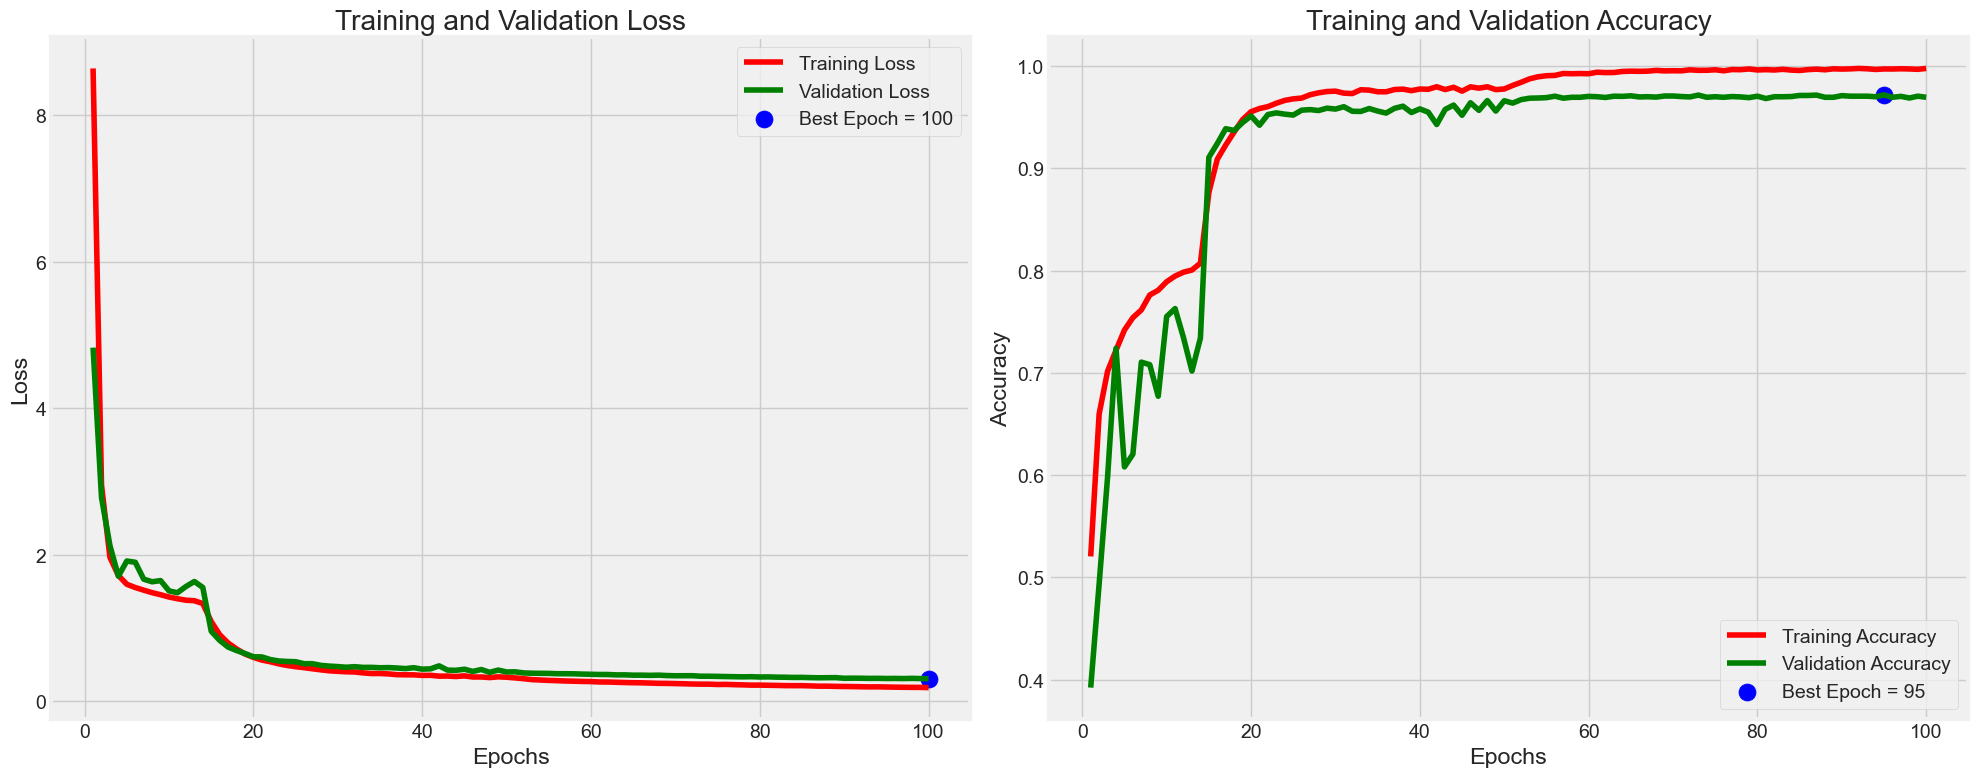

In [ ]:
plot_training(history)


## Checking our accuracy score

In [22]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9667 - loss: 0.3157
Test Accuracy: 96.96%
Test Loss: 0.3087


### Model performacne tracking through other matrices

176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

          AK       0.96      0.99      0.97       980
         BCC       0.95      0.90      0.93       484
         BKL       0.91      0.92      0.92       588
          DF       1.00      1.00      1.00       999
         MEL       0.93      0.70      0.80       153
          NV       0.98      0.96      0.97       436
         SCC       0.97      0.99      0.98       992
        VASC       1.00      1.00      1.00      1000

    accuracy                           0.97      5632
   macro avg       0.96      0.93      0.95      5632
weighted avg       0.97      0.97      0.97      5632



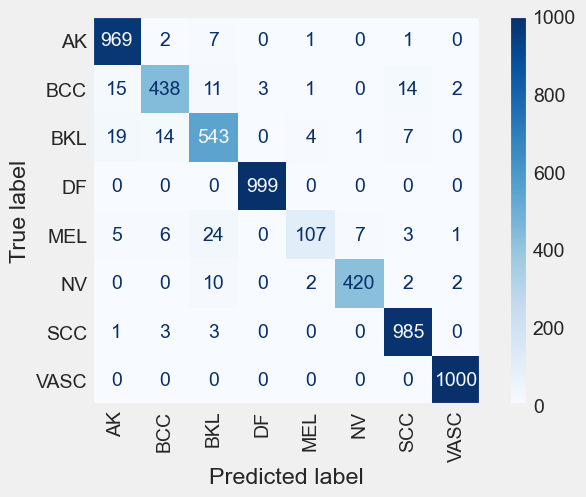

In [23]:
y_pred = np.argmax(model.predict(X_test_reshaped), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')

# Remove gridlines
plt.gca().grid(False)  # gca() gets the current axes
plt.show()

**We can see our custom develop CNN model achieved an accuracy score of 96.96%. Now for comparison we will try VGG-16 model which is a pre-trained model on a vast amount of image data**

## VGG-16 model (transfer learning)

In [31]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Resize images to (32, 32, 3) as VGG16 requires at least 32x32 input
X_train = tf.image.resize(X_train_reshaped, (32, 32)) / 255.0
X_test = tf.image.resize(X_test_reshaped, (32, 32)) / 255.0

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,                
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Output layer (8 categories)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                    validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Make Predictions
predictions = model.predict(X_test)
predicted_labels = predictions.argmax(axis=1)

Epoch 1/20
608/608 ━━━━━━━━━━━━━━━━━━━━ 151s 246ms/step - accuracy: 0.2679 - loss: 1.9316 - val_accuracy: 0.4709 - val_loss: 1.5025
Epoch 2/20
608/608 ━━━━━━━━━━━━━━━━━━━━ 156s 256ms/step - accuracy: 0.4406 - loss: 1.5319 - val_accuracy: 0.5040 - val_loss: 1.3693
Epoch 3/20
608/608 ━━━━━━━━━━━━━━━━━━━━ 161s 265ms/step - accuracy: 0.4830 - loss: 1.3990 - val_accuracy: 0.5291 - val_loss: 1.2953
Epoch 4/20
608/608 ━━━━━━━━━━━━━━━━━━━━ 149s 245ms/step - accuracy: 0.5126 - loss: 1.3330 - val_accuracy: 0.5452 - val_loss: 1.2472
Epoch 5/20
608/608 ━━━━━━━━━━━━━━━━━━━━ 144s 237ms/step - accuracy: 0.5310 - loss: 1.2755 - val_accuracy: 0.5606 - val_loss: 1.2117
Epoch 6/20
608/608 ━━━━━━━━━━━━━━━━━━━━ 148s 243ms/step - accuracy: 0.5341 - loss: 1.2546 - val_accuracy: 0.5696 - val_loss: 1.1814
Epoch 7/20
608/608 ━━━━━━━━━━━━━━━━━━━━ 144s 236ms/step - accuracy: 0.5458 - loss: 1.2186 - val_accuracy: 0.5849 - val_loss: 1.1531
Epoch 8/20
608/608 ━━━━━━━━━━━━━━━━━━━━ 148s 243ms/step - accuracy: 0.5627 -

**So we can see VGG16 model isn't performing well for this dataset as it is giving us only 66% accuracy. So we will use our custom developed CNN model with dense network for this classification.**

# Using our saved custom developed CNN model for prediction

In [17]:
from tensorflow.keras.models import load_model
loaded_model = load_model('skin_lesion.keras')

In [18]:
# Function to encode the image and model prediction
def predict_image(model, image_path, label_encoder):
    # Load and preprocess the image (same as training)
    img = load_and_resize_images([image_path])[0]  # Assuming this returns (28,28,3)
    
    # Expand dimensions for batch prediction
    img = np.expand_dims(img, axis=0)
    
    # Predict
    predictions = model.predict(img)
    predicted_class_idx = np.argmax(predictions, axis=1)
    predicted_class = label_encoder.inverse_transform(predicted_class_idx)
    
    return predicted_class[0], predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted: AK with confidence 1.00


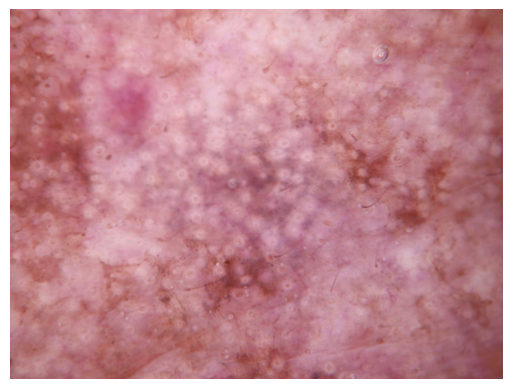

In [38]:
# Example usage
image_path = "D:\Sask Polytech- Artificial Inteligence & Data Analytis\Friday- PROJ-613-T02 Capstone Project\Skin Lesion- large dataset\ISIC_0025953-AK.jpg"
class_name, confidence = predict_image(loaded_model, image_path, label_encoder)
print(f"Predicted: {class_name} with confidence {np.max(confidence):.2f}")

# Display the image
plt.imshow(plt.imread(image_path))
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted: DF with confidence 1.00


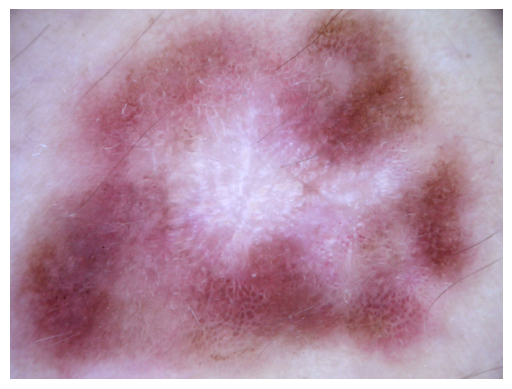

In [39]:
# Example usage
image_path = "D:\Sask Polytech- Artificial Inteligence & Data Analytis\Friday- PROJ-613-T02 Capstone Project\Skin Lesion- large dataset\ISIC_0032613-DF.jpg"
class_name, confidence = predict_image(loaded_model, image_path, label_encoder)
print(f"Predicted: {class_name} with confidence {np.max(confidence):.2f}")

# Display the image
plt.imshow(plt.imread(image_path))
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted: MEL with confidence 0.63


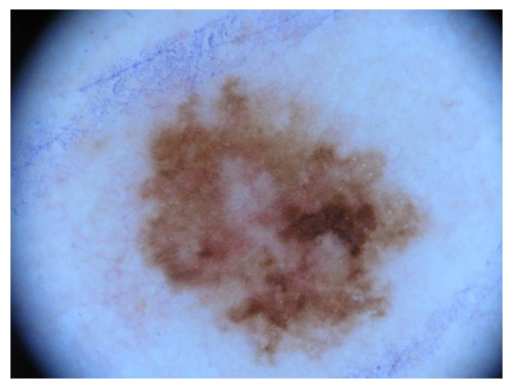

In [40]:
# Example usage
image_path = "D:\Sask Polytech- Artificial Inteligence & Data Analytis\Friday- PROJ-613-T02 Capstone Project\Skin Lesion- large dataset\ISIC_0000002-ML.jpg"
class_name, confidence = predict_image(loaded_model, image_path, label_encoder)
print(f"Predicted: {class_name} with confidence {np.max(confidence):.2f}")

# Display the image
plt.imshow(plt.imread(image_path))
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted: MEL with confidence 0.99


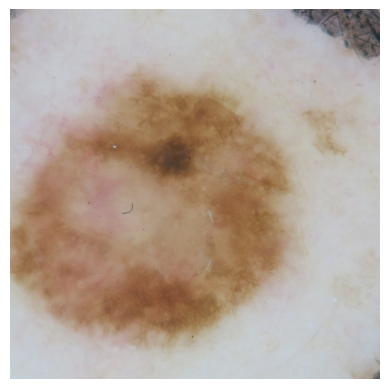

In [41]:
# Example usage
image_path = "D:\Sask Polytech- Artificial Inteligence & Data Analytis\Friday- PROJ-613-T02 Capstone Project\Skin Lesion- large dataset\ISIC_0073092-NV.jpg"
class_name, confidence = predict_image(loaded_model, image_path, label_encoder)
print(f"Predicted: {class_name} with confidence {np.max(confidence):.2f}")

# Display the image
plt.imshow(plt.imread(image_path))
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted: BCC with confidence 0.98


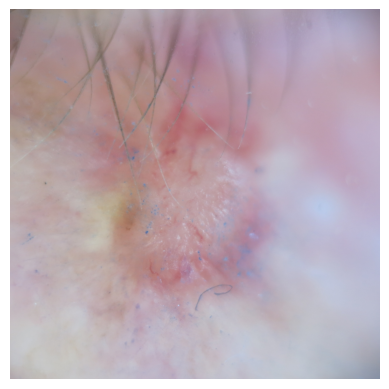

In [42]:
# Example usage
image_path = "D:\Sask Polytech- Artificial Inteligence & Data Analytis\Friday- PROJ-613-T02 Capstone Project\Skin Lesion- large dataset\ISIC_0065075-BCC.jpg"
class_name, confidence = predict_image(loaded_model, image_path, label_encoder)
print(f"Predicted: {class_name} with confidence {np.max(confidence):.2f}")

# Display the image
plt.imshow(plt.imread(image_path))
plt.axis('off')
plt.show()

# Conclusion

The project shows AI-powered deep learning models reach exceptional diagnostic precision levels during skin lesion identification which can be used for early detection of various types of skin leasions.